In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read csv file
table = pd.read_csv('C:/APersonal/Python/train (1).csv')


In [4]:
#Remove ID Customer-ID SSN columns
table = table.drop(['ID','Customer_ID','SSN'],axis=1)

In [5]:
#Check missing value and duplicate row
missingvalue = table.isna().sum()
col = table.columns
drow = table.duplicated(keep = False).sum()

In [6]:
#Check the data type in each colummn
result = table.dtypes


In [7]:
# Combine Missing value,Data Type and Duplicated
tmp = pd.concat([result,missingvalue],axis=1)
mvalue = pd.Series(tmp[1],name='Missing Value')
datatype = pd.Series(tmp[0],name='Data Type')

In [74]:
df = pd.concat([mvalue,datatype],axis=1)
df["Duplicated"]=[0]*25
print(df)

                          Missing Value Data Type  Duplicated
Month                                 0     int64           0
Name                                  0    object           0
Age                                   0     int64           0
Occupation                            0    object           0
Annual_Income                         0   float64           0
Monthly_Inhand_Salary                 0   float64           0
Num_Bank_Accounts                     0     int64           0
Num_Credit_Card                       0     int64           0
Interest_Rate                         0     int64           0
Num_of_Loan                           0     int64           0
Type_of_Loan                          0    object           0
Delay_from_due_date                   0     int64           0
Num_of_Delayed_Payment                0     int64           0
Changed_Credit_Limit                  0   float64           0
Num_Credit_Inquiries                  0     int64           0
Credit_M

In [15]:
#Get the avg of the continuous column in duplicate row
lis = table.select_dtypes(include='float64')
lis = lis.columns
col_avg = table.groupby('Name',as_index=False,sort=False)[lis].mean()
#keep the final row
last_row = table.drop_duplicates(subset='Name',keep='last')
last_row = last_row.reset_index()
last_row = last_row.drop('index',axis=1)
last_row[lis] = col_avg[lis]


<AxesSubplot:xlabel='Occupation', ylabel='count'>

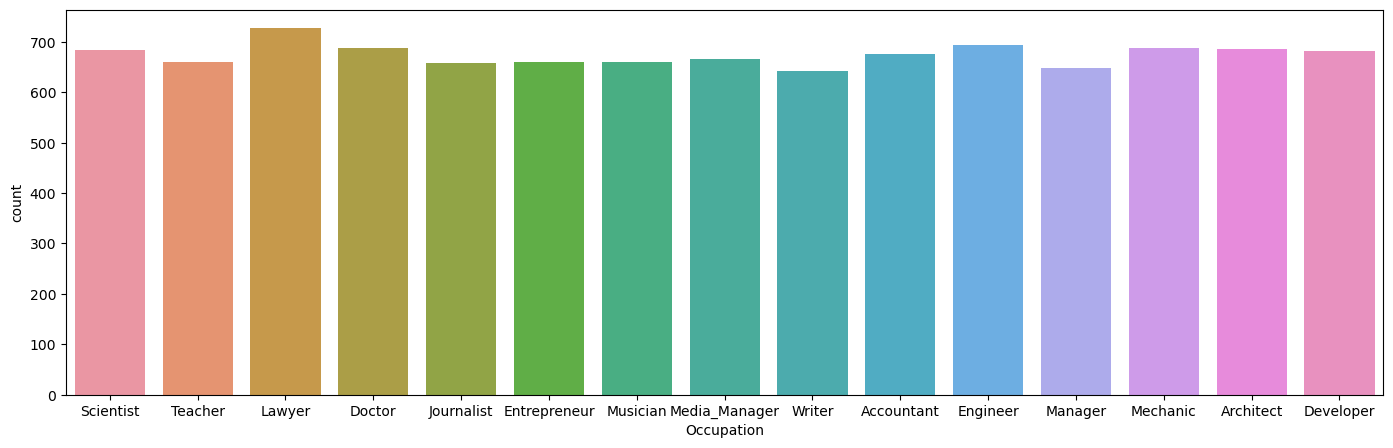

In [13]:
#Distribution of Occupation
plt.figure(figsize=(17,5))
sns.countplot(x="Occupation",data=last_row)

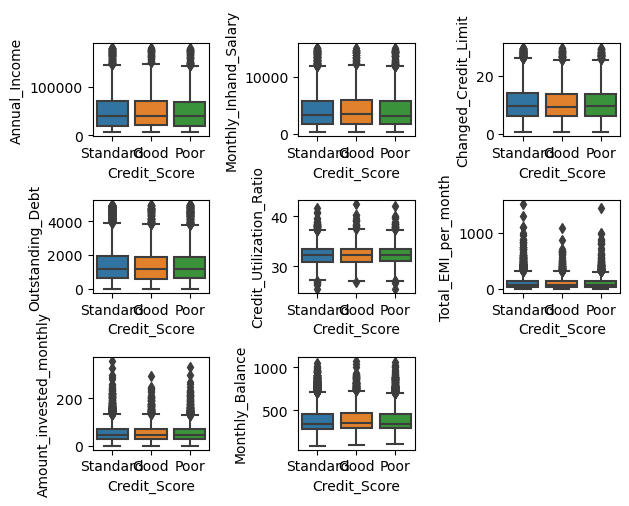

In [57]:
#box plot between Credit_Score and Monthly_Balance
n = 1
for colname in lis:
    plt.subplot(3,3
                ,n)
    plt.tight_layout()
    sns.boxplot(x="Credit_Score",y=colname,data=last_row)
    n = n + 1


       Month  Age  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0          1   23                  3                4              3   
1          2   23                  3                4              3   
2          3   23                  3                4              3   
3          4   23                  3                4              3   
4          5   23                  3                4              3   
...      ...  ...                ...              ...            ...   
99995      4   25                  4                6              7   
99996      5   25                  4                6              7   
99997      6   25                  4                6              7   
99998      7   25                  4                6              7   
99999      8   25                  4                6              7   

       Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0                4                    3                       7   
1

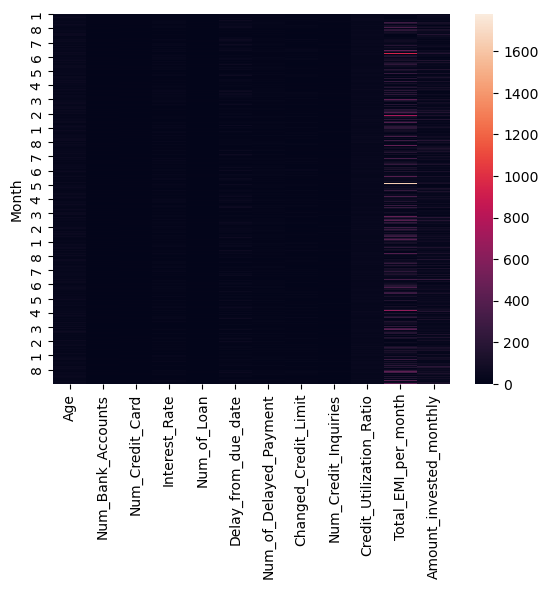

In [80]:
nummatrix = table.select_dtypes(include='number')
nummatrix = nummatrix.drop(["Annual_Income","Monthly_Inhand_Salary","Monthly_Balance","Outstanding_Debt","Credit_History_Age"],axis=1)
print(nummatrix)
nummatrix = nummatrix.set_index('Month')
heat = sns.heatmap(data = nummatrix)
print(heat)